# Bayesian Hyperparameter

## Read Boston Housing dataset and define dataset

In [1]:
#import required libaries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
from pandas import read_csv
import pandas as pd
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RationalQuadratic, WhiteKernel
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import matplotlib.pyplot as plt
import numpy as np

# import customized helper functions
import helper_functions

In [2]:
#load the dataset 'Boston housing'
X, y = helper_functions.read_boston_housing()

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


## SVM Regression Plot

Cross Validation Score for models with a polynomial degree of 0.5: MSE = 32.76
Cross Validation Score for models with a polynomial degree of 12: MSE = 51.85


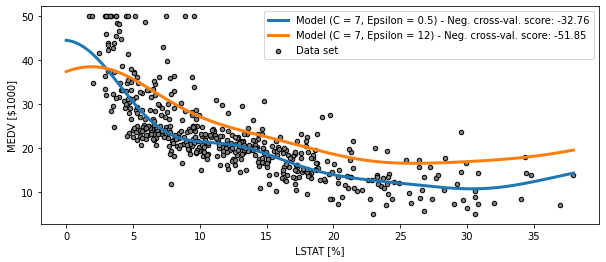

In [3]:
# test data set
epsilon = [0.5, 12]
C = [7, 7]

plt.figure(figsize=(10, 4))
ax = plt.subplot(1, 1, 1)
# plt.setp(ax)

for i in range(len(C)):
    X_test, y_test, scores = helper_functions.cross_validation_svm_regression(X, y, C[i], epsilon[i])
    plt.plot(X_test, y_test, linewidth=3.0, label="Model (C = " + str(C[i]) + ", Epsilon = " + str(
        epsilon[i]) + ") - Neg. cross-val. score: " + str(round(scores.mean(), 2)))

plt.scatter(X, y, edgecolor='black', color='grey', s=20, label="Data set")
plt.xlabel("LSTAT [%]")
plt.ylabel("MEDV [$1000]")

plt.legend(loc="best")
# plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))

plt.savefig(r"./plots/polynomial_regression_example.png", dpi=150)
plt.savefig(r"./plots/polynomial_regression_example.svg")

plt.show()

## 2d-plot

In [4]:
epsilon_min = 0.01
epsilon_max = 15
C_min = 7
C_max = 7.0001
step = 0.01
X = X
y = y

In [5]:
epsilon_list = list(np.arange(epsilon_min, epsilon_max, step))
C_list = list(np.arange(C_min, C_max, step))

# calculate cv_score for each hyperparameter combination
cv_scores, c_settings, epsilon_settings = helper_functions.grid_search(epsilon_list, C_list, X, y)

x_plot = epsilon_settings
y_plot = cv_scores

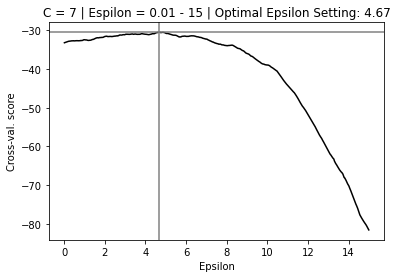

In [6]:
# define figure
fig, ax1 = plt.subplots(1)
#ax1.plot(x_plot, y_plot, 'ko', ms=3)
ax1.plot(x_plot, y_plot, color='black')

#ax1.set(xlim=(min(x_plot), max(x_plot)), ylim=(min(y_plot), max(y_plot)))
# ax1.set_title('grid and contour (%d points, %d grid points)' %
#              (npts, ngridx * ngridy))
ax1.set_xlabel('Epsilon')
ax1.set_ylabel('Cross-val. score')


#calc optimal epsilon setting
max_cv_score = max(cv_scores)
index_max_cv_score = cv_scores.index(max_cv_score)
epsilon_optimal = epsilon_settings[index_max_cv_score]
ax1.axvline(x=epsilon_optimal, color = 'grey')
ax1.axhline(y=max_cv_score, color = 'grey')

ax1.title.set_text("C = {} | Espilon = {} - {} | Optimal Epsilon Setting: {}".format(C_min, epsilon_min, epsilon_max, epsilon_optimal))

hyperparameter_opt_2d_df = pd.DataFrame(
    {'c_setting': c_settings,
     'epsilon_setting': epsilon_settings,
     'cv_scores': cv_scores
     })

filename = r"./data/hyperparameter_evaluation_2d_epsilon=" + str(epsilon_min)\
    + '-' + str(epsilon_max) + '_C=' + str(C_min) + "-" + str(C_max) + ".csv"
hyperparameter_opt_2d_df.to_csv(filename, index=False)

# plt.subplots_adjust(hspace=0.5)
plt.savefig(r"./plots/hyperparameter_evaluation_2d.png", dpi=150)
plt.savefig(r"./plots/hyperparameter_evaluation_2d.svg")
plt.show()


## Create svm regression model and plot

Cross Validation Score for models with a polynomial degree of 2: MSE = 37.06
Cross Validation Score for models with a polynomial degree of 2: MSE = 32.19
Cross Validation Score for models with a polynomial degree of 2: MSE = 31.64


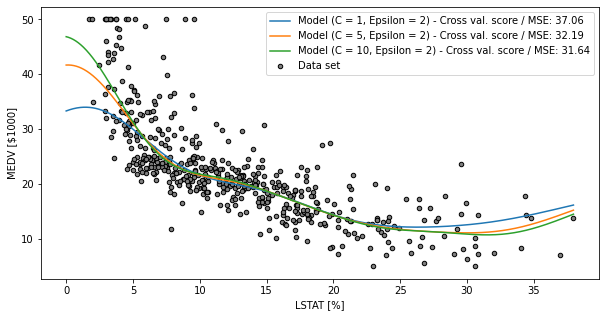

<Figure size 432x288 with 0 Axes>

In [7]:
import matplotlib.pyplot as plt

# test data set
epsilon = [2, 2, 2]
C = [1, 5, 10]


plt.figure(figsize=(10, 5))
ax = plt.subplot(1, 1, 1)
#plt.setp(ax)
    
for i in range(len(C)):
    X_test, y_test, scores = helper_functions.cross_validation_svm_regression(X, y, C[i], epsilon[i])
    plt.plot(X_test, y_test, label="Model (C = " + str(C[i]) + ", Epsilon = " + str(epsilon[i]) + ") - Cross val. score / MSE: " + str(round(-scores.mean(), 2)))
    
plt.scatter(X, y, edgecolor='black', color='grey', s=20, label="Data set")
plt.xlabel("LSTAT [%]")
plt.ylabel("MEDV [$1000]")

plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

plt.savefig("polynomial_regression_example.png", dpi=150)

## Define the hyperparameter space and carry out a grid search

* epsilon = 1-20
* C = 1-10

ValueError: min() arg is an empty sequence

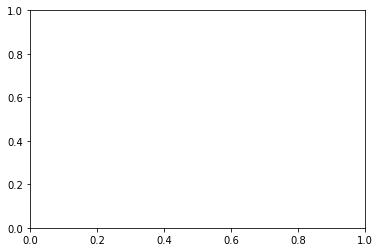

In [8]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

ngridx = 100
ngridy = 200
npts = 200

# define the hyperparameter space
hyperparameter_space = 3

if hyperparameter_space == 1:
    epsilon_min = 1
    epsilon_max = 20
    C_min = 1
    C_max =20
    step = 1
    
if hyperparameter_space == 2:
    epsilon_min = 1
    epsilon_max =8
    C_min = 1
    C_max =20
    step = 1
    
if hyperparameter_space == 3:
    epsilon_min = 1
    epsilon_max =12
    C_min = 20
    C_max =20
    step = 0.1
    
epsilon = list(np.arange(epsilon_min,epsilon_max,step))
C = list(np.arange(C_min,C_max,step))

#calculate cv_score for each hyperparameter combination
cv_scores, c_settings, epsilon_settings = helper_functions.grid_search(epsilon, C, X, y)

#define plot dimensions
x_plot = c_settings
y_plot = epsilon_settings
z_plot = cv_scores

#define figure
fig, ax1 = plt.subplots(1)

# -----------------------
# Interpolation on a grid
# -----------------------
# A contour plot of irregularly spaced data coordinates
# via interpolation on a grid.

# Create grid values first.
xi = np.linspace(min(x_plot)-1, max(x_plot)+1, ngridx)
yi = np.linspace(min(y_plot)-1, max(y_plot)+1, ngridy)

# Perform linear interpolation of the data (x,y)
# on a grid defined by (xi,yi)
triang = tri.Triangulation(x_plot, y_plot)
interpolator = tri.LinearTriInterpolator(triang, z_plot)
Xi, Yi = np.meshgrid(xi, yi)
zi = interpolator(Xi, Yi)

# Note that scipy.interpolate provides means to interpolate data on a grid
# as well. The following would be an alternative to the four lines above:
ax1.contour(xi, yi, zi, levels=14, linewidths=0.5, colors='k')
cntr1 = ax1.contourf(xi, yi, zi, levels=14, cmap="RdBu_r")

fig.colorbar(cntr1, ax=ax1)
ax1.plot(x_plot, y_plot, 'ko', ms=3)
ax1.set(xlim=(min(x_plot), max(x_plot)), ylim=(min(y_plot), max(y_plot)))
#ax1.set_title('grid and contour (%d points, %d grid points)' %
#              (npts, ngridx * ngridy))
ax1.set_xlabel('C')
ax1.set_ylabel('Epsilon')

#plt.subplots_adjust(hspace=0.5)
plt.show()

In [ ]:
cv_scores

# 2-dimensional Hyperparamter Optimization

In [ ]:
import pandas as pd
grid_search_results = pd.DataFrame(
    {'cv_scores': cv_scores,
     'c_setting': c_settings,
     'epsilon_setting': epsilon_settings
    })

grid_search_results = grid_search_results[grid_search_results.c_setting == 19]
grid_search_results

In [ ]:
grid_search_results.c_setting.to_list()

In [ ]:
plt.plot(grid_search_results.epsilon_setting, grid_search_results.cv_scores)

# Mean Squared Error (MSE)

\operatorname{MSE}=\frac{1}{n}\sum_{i=1}^n(Y_i-\hat{Y_i})^2

## Grid Search: with Cross Validation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, 1, 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    print("Cross Validation Score for models with a polynomial degree of " + str(degrees[i]) + ": MSE = " + str(round(-scores.mean(),2)))

    X_test = np.linspace(0, 1, 1000)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model (Polynomial Degree = " + str(degrees[i]) + ")")
    
#plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

cv_scores = []
degrees = []

plt.figure(figsize=(14, 5))
for degree in range(1,30,1):
    ax = plt.subplot(1, 1, 1)
    #plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    #print("Cross Validation Score for models with a polynomial degree of " + str(degrees[i]) + ": MSE = " + str(round(-scores.mean(),2)))

    cv_scores.append(-scores.mean())
    degrees.append(degree)

    
plt.plot(degrees, cv_scores)
plt.xlabel("x")
plt.ylabel("y")
#plt.xlim((0, 1))
#plt.ylim((-2, 2))
#plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

#def true_fun(X):
#    return np.cos(1.5 * np.pi * X)


#np.random.seed(0)

#n_samples = 30

#X = np.sort(np.random.rand(n_samples))
#y = true_fun(X) + np.random.randn(n_samples) * 0.1

cv_scores = []
degrees = []

plt.figure(figsize=(14, 5))
for eps in range(0,50000,100):
    ax = plt.subplot(1, 1, 1)
    #plt.setp(ax, xticks=(), yticks=())

    regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.0001*eps))

    # Evaluate the models using crossvalidation
    scores = cross_val_score(regr, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)
    #print("Cross Validation Score for models with a polynomial degree of " + str(degrees[i]) + ": MSE = " + str(round(-scores.mean(),2)))

    cv_scores.append(-scores.mean())
    degrees.append(0.0001*eps)

    
plt.plot(degrees, cv_scores)
plt.xlabel("x")
plt.ylabel("y")
#plt.xlim((0, 1))
#plt.ylim((-2, 2))
#plt.legend(loc="best")
#plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
#    degrees[i], -scores.mean(), scores.std()))
plt.show()

In [ ]:
cv_scores[40]

# Gaussian Process to accelerate the process

## Helper function for creating the graph

# Sample Dataset

In [ ]:
rng = np.random.RandomState(4)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 5

# Applying the dataset

In [ ]:
import numpy as np
X_train = np.array([degrees[1], degrees[50], degrees[99]])
X_train = X_train.reshape(3, -1)
y_train = [cv_scores[1],cv_scores[40], cv_scores[99]]
#y_train = y_train.reshape(3, -1)
print(len(X_train))
print(len(y_train))

In [ ]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
gpr.fit(X_train, y_train)

In [ ]:
%matplotlib
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10, 8))

# plot prior
helper_functions.plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
axs[0].set_title("Samples from prior distribution")

# plot posterior
gpr.fit(X_train, y_train)
helper_functions.plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red", zorder=10, label="Observations")
axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
axs[1].set_title("Samples from posterior distribution")

fig.suptitle("Radial Basis Function kernel", fontsize=18)
plt.tight_layout()

In [ ]:
y_train

# Baysian Optimization

In [ ]:
# import customized helper functions
import helper_functions

#load the dataset 'Boston housing'
X, y = helper_functions.read_boston_housing()

In [ ]:
def bayesian_optimization(sample_iterations, C_fix, Epsilon_initial_sample):

    # read black-box function values
    df = pd.read_csv (r'.\data\hyperparameter_evaluation_2d_epsilon=0.01-15_C=7-7.0001.csv')

    C_list =[C_fix]
    Epsilon_list = [Epsilon_initial_sample]

    C_list =[C_fix]
    Epsilon_list = [Epsilon_initial_sample]

    # #calculate cv score for sample points
    # cv_scores, c_settings, epsilon_settings = helper_functions.grid_search(Epsilon_list, C_list, X, y)
    #
    # #select_sample_indexes = [19, 40, 60, 90, 200, 220]
    # y_train_sample = cv_scores
    # X_train_sample = epsilon_settings

    # for i in select_sample_indexes:
    #     y_train_sample.append(df.cv_scores.tolist()[i])
    #     X_train_sample.append(df.epsilon_setting.tolist()[i])

    # X_train_sample = np.array(X_train_sample)
    # X_train_sample = X_train_sample.reshape(-1, 1)

    X_train_sample, y_train_sample = helper_functions.generate_train_data_set(C_list, Epsilon_list, X, y)

    # use calculated values of the black-box function to compare with GP
    y_black_box = df.cv_scores.tolist()

    #X_black_box = df.epsilon_setting.tolist()
    X_black_box = np.array(df.epsilon_setting)
    X_black_box = X_black_box.reshape(-1, 1)

    for i in range(0,sample_iterations,1):
        # create plots of prior and posteriori Gaussian Process
        x_next_sample_point = helper_functions.plot_gaussian_process(X_train_sample,
                                               y_train_sample,
                                               X_black_box,
                                               y_black_box,
                                               x_min=0.1,
                                               x_max=15,
                                               y_min=min(y_train_sample)-50,
                                               y_max=max(y_train_sample)+50)

        # append new sampling point for Espilon to train data set and train GP model again
        Epsilon_list.append(x_next_sample_point)
        X_train_sample, y_train_sample = helper_functions.generate_train_data_set(C_list, Epsilon_list, X, y)


In [ ]:
import warnings
warnings.filterwarnings('ignore')

bayesian_optimization(sample_iterations=8, C_fix = 7, Epsilon_initial_sample = 3.5)

## 2d-plot

In [ ]:
def plot_2d_progress(end_index, epsilon_settings, cv_scores, C):
    x_plot = epsilon_settings[:end_index].tolist()
    y_plot = cv_scores[:end_index].tolist()

    # define figure
    fig, ax1 = plt.subplots(nrows=1, figsize=(10, 3))
    ax1.plot(x_plot, y_plot, color='black', label='Black-box function')

    ax1.set_xlabel('Epsilon')
    ax1.set_ylabel('Neg. cross-val. score')
    #ax1.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

    #calc optimal epsilon setting
    max_cv_score = max(y_plot)
    index_max_cv_score = cv_scores.tolist().index(max_cv_score)
    epsilon_optimal = epsilon_settings[index_max_cv_score]
    
    ax1.axvline(x=epsilon_optimal, color = 'grey')
    ax1.axhline(y=max_cv_score, color = 'grey')

    ax1.title.set_text("C = {} / Optimal Epsilon Setting = {}".format(C, epsilon_optimal))
    ax1.set(xlim=(0, 15), ylim=(-80, -20))
    
    filename = r'./plots/hyperparameter_evaluation_2d_gif_index_' + str(end_index)
    filename_svg = filename + '.svg'
    filename_png = filename + '.png'
        
    # plt.subplots_adjust(hspace=0.5)
    plt.savefig(filename_png, dpi=150)
    plt.savefig(filename_svg)
    plt.show()

In [ ]:
df = pd.read_csv (r'.\data\hyperparameter_evaluation_2d_epsilon=0.01-15_C=7-7.0001.csv')
cv_scores = df.cv_scores
epsilon_settings = df.epsilon_setting

for i in range(100,4000,100):
    plot_2d_progress(end_index = i, epsilon_settings = epsilon_settings, cv_scores = cv_scores, C=7)

In [ ]:
len(df.cv_scores)

## 2d evaluation using different granularity rates

In [40]:
def plot_2d_progress_step_size(step_size, epsilon_settings, cv_scores, C):
    index_list = list(range(0,len(epsilon_settings.tolist()),step_size))
    
    x_plot = []
    y_plot = []
    for k in index_list:
        x_plot.append(epsilon_settings.tolist()[k])
        y_plot.append(cv_scores.tolist()[k])

    # define figure
    fig, ax1 = plt.subplots(nrows=1, figsize=(10, 3))
    ax1.plot(x_plot, y_plot, color='black', label='Black-box function')
    ax1.scatter(x_plot, y_plot)

    ax1.set_xlabel('Epsilon')
    ax1.set_ylabel('Neg. cross-val. score')
    #ax1.legend(bbox_to_anchor=(1.05, 1.0), loc="upper left")

    #calc optimal epsilon setting
    max_cv_score = max(y_plot)
    index_max_cv_score = y_plot.index(max_cv_score)
    epsilon_optimal = x_plot[index_max_cv_score]
    
    ax1.axvline(x=epsilon_optimal, color = 'grey')
    ax1.axvline(x=4.67, color = 'red')
    ax1.axhline(y=max_cv_score, color = 'grey')

    step_size_epsilon = round((max(epsilon_settings)-min(epsilon_settings))/len(epsilon_settings),3) * step_size
    ax1.title.set_text("C = {} / Epsilon Step Size = {}".format(C, step_size_epsilon))
    ax1.set(xlim=(0, 15), ylim=(-80, -20))
    
    filename = r'./plots/2d_evaluation_granularity/hyperparameter_evaluation_2d_gif_step_size_' + str(step_size_epsilon)
    filename_svg = filename + '.svg'
    filename_png = filename + '.png'
        
    # plt.subplots_adjust(hspace=0.5)
    plt.savefig(filename_png, dpi=150)
    #plt.savefig(filename_svg)
    plt.show()

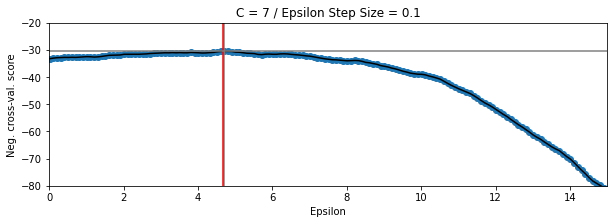

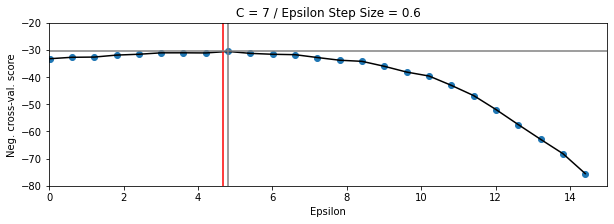

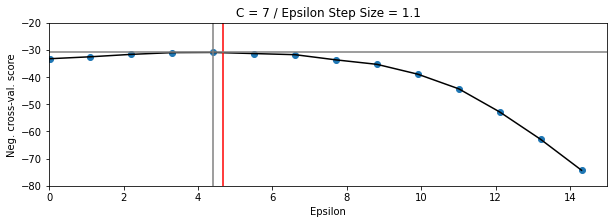

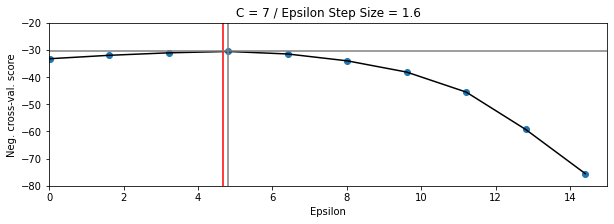

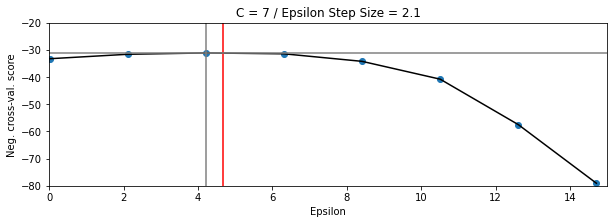

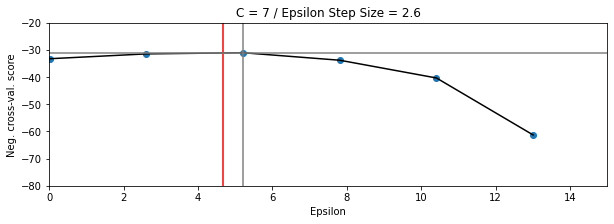

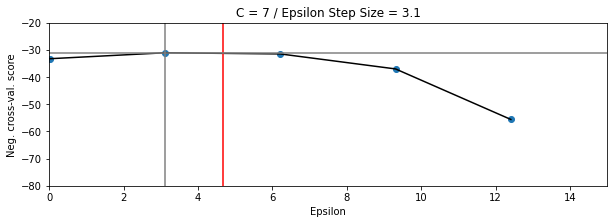

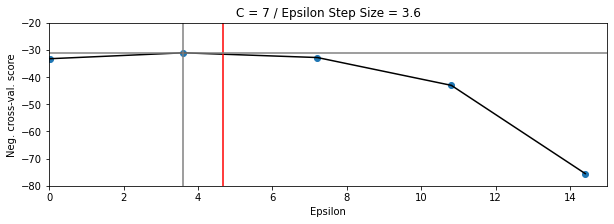

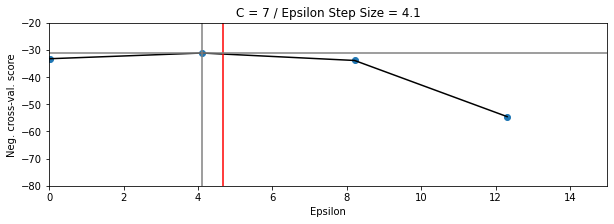

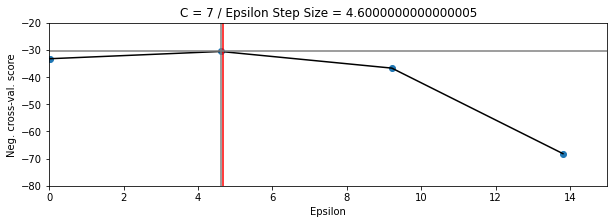

In [41]:
df = pd.read_csv (r'.\data\hyperparameter_evaluation_2d_epsilon=0.01-15_C=7-7.0001.csv')
cv_scores = df.cv_scores
epsilon_settings = df.epsilon_setting

range_max = 500
range_min = 10
index_step_size = 50

for i in range(range_min,range_max,index_step_size):
    plot_2d_progress_step_size(step_size = i, epsilon_settings = epsilon_settings, cv_scores = cv_scores, C=7)

In [39]:
x_plot = []
y_plot = []
for k in index_list:
    x_plot.append(epsilon_settings.tolist()[k])
    y_plot.append(cv_scores.tolist()[k])

NameError: name 'index_list' is not defined

In [ ]:
x_plot

In [ ]:
step_size = 50
index_list = list(range(0,len(epsilon_settings.tolist()),step_size))
index_list